## Importing necessary libraries

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

style.use('fivethirtyeight') or plt.style.use('fivethirtyeight')

## Importing Datasets

In [292]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## Displaying data types

In [293]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [294]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [295]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Checking for missing values

In [296]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

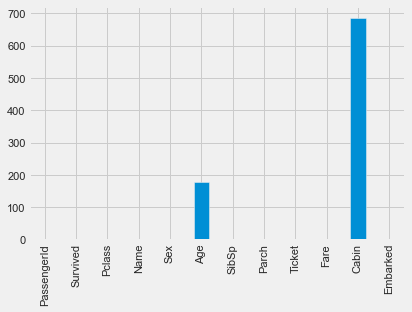

In [297]:
df_train.isnull().sum().plot(kind='bar')

Found missing values in columns: Age, Cabin, Embarked. 
Replacing with median (Age) and mode (Embarked).

In [298]:
age_median = df_train['Age'].median()
df_train['Age'] = df_train['Age'].fillna(age_median)

from collections import Counter

keys = [k for k, v in Counter(df_train['Embarked']).most_common()]
df_train['Embarked'] = df_train['Embarked'].fillna(keys[0])

Doing the same for test set

In [299]:
df_test['Age'] = df_test['Age'].fillna(age_median)
df_test['Embarked'] = df_test['Embarked'].fillna(keys[0])

## Feature engineering

Dropping unnecessary columns: PassengerId, Name, Ticket, Cabin

In [300]:
df_train = df_train.drop(['Name', 'Ticket', 'Cabin'], axis=1)

### 1. Passenger class

In [301]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:>

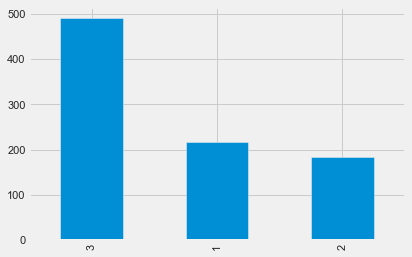

In [302]:
df_train['Pclass'].value_counts().plot(kind='bar')

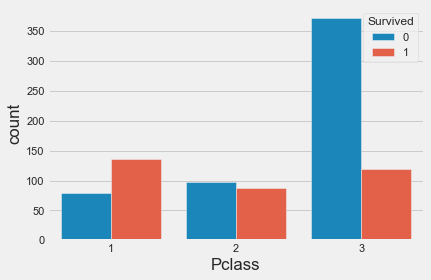

In [316]:
ax = sns.countplot(x=df_train['Pclass'], hue=df_train['Survived'])

In [331]:
gb = df_train.groupby(['Pclass', 'Survived'])
gb.first()

PassengerId  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
Pclass Survived                                                              
1      0                   7    1  54.0      0      0  51.8625           0   
       1                   2    0  38.0      1      0  71.2833           1   
2      0                  21    1  35.0      0      0  26.0000           0   
       1                  10    0  14.0      1      0  30.0708           1   
3      0                   1    1  22.0      1      0   7.2500           0   
       1                   3    0  26.0      0      0   7.9250           0   

                 Embarked_Q  Embarked_S  
Pclass Survived                          
1      0                  0           1  
       1                  0           0  
2      0                  0           1  
       1                  0           0  
3      0                  0           1  
       1                  0           1

In [305]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})

pd.get_dummies(df_train['Embarked'], prefix='Embarked').head(5)
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked'], prefix='Embarked')], axis=1)
df_train = df_train.drop(['Embarked'], axis=1)

x_train = df_train.iloc[:, 2:].values
y_train = df_train['Survived']

In [306]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'max_features': [0.5, 1.],
    'max_depth': [5., None],
}

grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 100), parameter_grid, cv=5, verbose=2)

In [307]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ...................max_depth=None, max_features=0.5; total time=   0.0s
[CV] END ...................max_depth=None, max_f

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5.0, None], 'max_features': [0.5, 1.0]},
             verbose=2)

In [308]:
grid_search.cv_results_['mean_test_score']

array([0.82045069, 0.81708618, 0.81931454, 0.81709874])

In [309]:
grid_search.best_params_

{'max_depth': 5.0, 'max_features': 0.5}

In [310]:
model = RandomForestClassifier(n_estimators = 50, max_features=1.0, max_depth=5.0, random_state=0)
model = model.fit(x_train, y_train)

In [311]:
df_test = df_test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

df_test['Age'] = df_test['Age'].fillna(age_mean)
df_test['Embarked'] = df_test['Embarked'].fillna(keys[0])

df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male':1})
df_test= pd.concat([df_test, pd.get_dummies(df_test['Embarked'], prefix='Embarked')], axis=1)
df_test= df_test.drop(['Embarked'], axis=1)

x_test = df_test.iloc[:, 2:]
y_test = df_test['Survived']

NameError: name 'age_mean' is not defined

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
np.sum(y_prediction == y_test)

In [ ]:
np.sum(y_prediction == y_test) / float(len(y_test))

In [ ]:
np.sum(y_test) / float(len(y_test))